## The Stock Market Data
We will use the "The Stock Market dataset” from the book “An Introduction to Statistical Learning, with applications in R”, G. James, D. Witten,  T. Hastie and R. Tibshirani, Springer, 2013. There is a package in R called ISLR with this dataset included.

Daily percentage returns for the S&P 500 stock index between 2001 and 2005 (source: raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged).

The stock market data includes 1250 examples of stock market information, each with 9 features: Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today and Direction. Direction is the class feature with two possible outcomes: up or down.

### Load data

In [2]:
install.packages("ISLR")
require(ISLR)
names(Smarket)
summary(Smarket)


The downloaded binary packages are in
	/var/folders/hx/tzq4mbtj1pj4gvxnfzdmx14h0000gn/T//RtmplavwKL/downloaded_packages


Loading required package: ISLR


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [5]:
?Smarket

### Analyze data

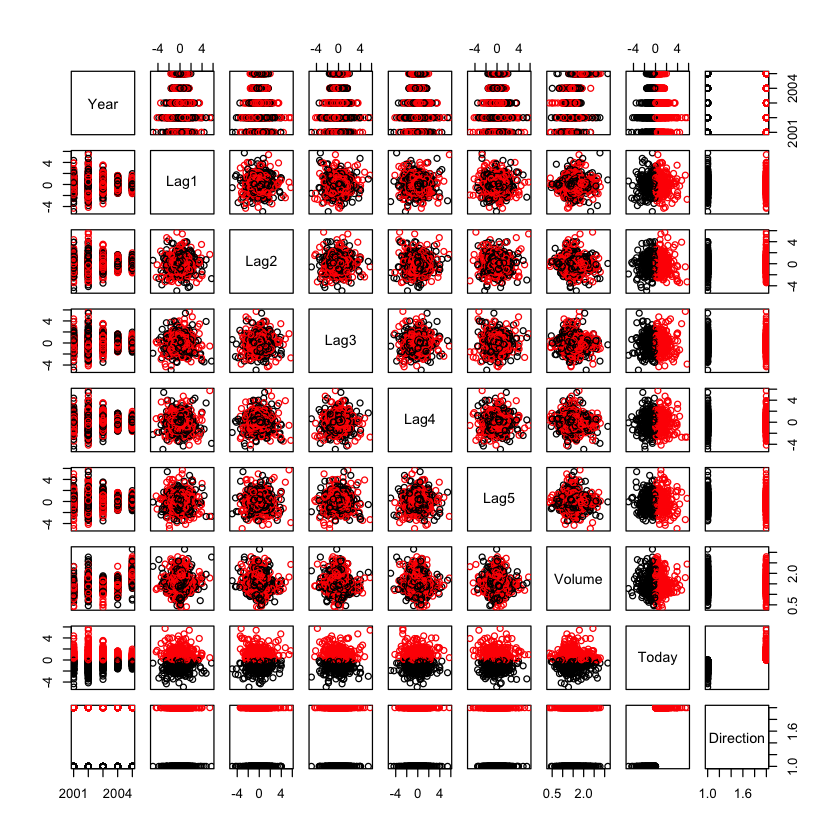

In [3]:
pairs(Smarket,col=Smarket$Direction)

In [4]:
cor(Smarket) # This won't work, why)

ERROR: Error in cor(Smarket): 'x' must be numeric


In [ ]:
cor(Smarket[,-9]) # Note that Volume has some correlation with Year...

In [ ]:
boxplot(Smarket$Volume~Smarket$Year)

In [ ]:
# Direction is derive from Today
cor(as.numeric(Smarket$Direction),Smarket$Today)

### Logistic regression - quick view

In [ ]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)

In [ ]:
glm.probs <- predict(glm.fit,type="response") 
glm.probs

In [13]:
glm.pred <- ifelse(glm.probs>0.5,"Up","Down")
glm.pred

1      2      3      4      5      6      7      8      9     10     11 
  "Up" "Down" "Down"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" "Down" "Down" 
    12     13     14     15     16     17     18     19     20     21     22 
  "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" 
    23     24     25     26     27     28     29     30     31     32     33 
  "Up" "Down"   "Up"   "Up" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" 
    34     35     36     37     38     39     40     41     42     43     44 
"Down"   "Up"   "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
    45     46     47     48     49     50     51     52     53     54     55 
  "Up"   "Up"   "Up" "Down"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up" 
    56     57     58     59     60     61     62     63     64     65     66 
  "Up" "Down"   "Up"   "Up"   "Up" "Down" "Down"   "Up" "Down" "Down" "Down" 
    67     68     69     70     71     72     73     74     75     76     77 
"Down"   "Up" "Down" "Down"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up" 
    78     79     80     81     82     83     84     85     86     87     88 
"Down"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" "Down" 
    89     90     91     92     93     94     95     96     97     98     99 
"Down" "Down"   "Up" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   100    101    102    103    104    105    106    107    108    109    110 
"Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   111    112    113    114    115    116    117    118    119    120    121 
  "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down"   "Up" "Down" 
   122    123    124    125    126    127    128    129    130    131    132 
"Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up" 
   133    134    135    136    137    138    139    140    141    142    143 
  "Up"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" 
   144    145    146    147    148    149    150    151    152    153    154 
  "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up" 
   155    156    157    158    159    160    161    162    163    164    165 
"Down"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" 
   166    167    168    169    170    171    172    173    174    175    176 
  "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down" 
   177    178    179    180    181    182    183    184    185    186    187 
  "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up"   "Up" "Down" 
   188    189    190    191    192    193    194    195    196    197    198 
"Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down"   "Up"   "Up" "Down" 
   199    200    201    202    203    204    205    206    207    208    209 
"Down"   "Up"   "Up"   "Up" "Down" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
   210    211    212    213    214    215    216    217    218    219    220 
  "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down"   "Up" 
   221    222    223    224    225    226    227    228    229    230    231 
  "Up"   "Up" "Down"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up" 
   232    233    234    235    236    237    238    239    240    241    242 
  "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up" "Down" "Down" "Down" "Down" 
   243    244    245    246    247    248    249    250    251    252    253 
  "Up"   "Up" "Down" "Down"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" 
   254    255    256    257    258    259    260    261    262    263    264 
  "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up"   "Up" "Down" 
   265    266    267    268    269    270    271    272    273    274    275 
  "Up"   "Up"   "Up"   "Up"   "Up" "Down" "Down" "Down"   "Up"   "Up"   "Up" 
   276    277    278    279    280    281    282    283    284    285    286 
  "Up"   "Up"   "Up"   "Up"

In [14]:
table(glm.pred,Smarket$Direction)
mean(glm.pred==Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

### Logistic regression - correct version

In [5]:
# Make training and test set
train <- (Smarket$Year < 2005)
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.fit


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
   0.191213    -0.054178    -0.045805     0.007200     0.006441    -0.004223  
     Volume  
  -0.116257  

Degrees of Freedom: 997 Total (i.e. Null);  991 Residual
Null Deviance:	    1383 
Residual Deviance: 1381 	AIC: 1395

In [6]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,], type="response") 
glm.pred <- ifelse(glm.probs >0.5,"Up","Down")
Direction.2005 <- Smarket$Direction[!train]
table(glm.pred,Direction.2005) # Overfitting!
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

### Logistic regression - smaller model

In [7]:
glm.fit <- glm(Direction~Lag1+Lag2, data=Smarket,family=binomial, subset=train)
glm.fit


Call:  glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = train)

Coefficients:
(Intercept)         Lag1         Lag2  
    0.03222     -0.05562     -0.04449  

Degrees of Freedom: 997 Total (i.e. Null);  995 Residual
Null Deviance:	    1383 
Residual Deviance: 1381 	AIC: 1387

In [8]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred <- ifelse(glm.probs > 0.5,"Up","Down")
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

### Logistic regression - Using caret...

In [9]:
require(caret)
glmFit <- train(Smarket[train,-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = trainControl(method = "cv"))
glmFit

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

998 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 898, 898, 898, 898, 899, 899, ... 
Resampling results:

  Accuracy   Kappa    
  0.9969899  0.9939752


## Exercise 2
Using the Smarket dataset perform 10 fold-cv with logistic regression.

In [10]:
control<-trainControl(method = "cv", number=10)
glmFit <- train(Smarket[train,-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = control)
glmFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

998 samples
  8 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 898, 899, 898, 898, 897, 898, ... 
Resampling results:

  Accuracy   Kappa    
  0.9969899  0.9939784
